# Signature detection using Image Processing Technique

### LIbrary imports

In [1]:
from io import BytesIO
from IPython.display import Image as IMG
from  PIL import Image
# import re

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
import numpy as np


### Basic image display Function

In [3]:
def show(img):
    cv2.imshow("", img)    
    cv2.waitKey()           
    cv2.destroyAllWindows()

def plt_disp(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def disp(a, fmt='jpeg'):
    a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    display(IMG(data=f.getvalue()))

## Signature detection


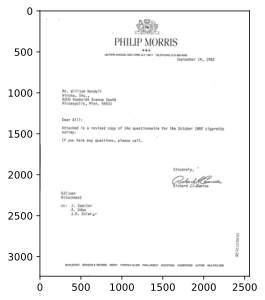

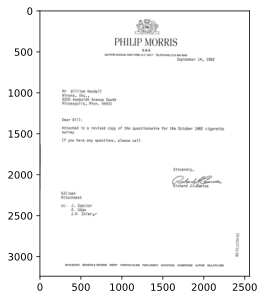

In [4]:
image = cv2.imread('../images/signatureDocuments/7.png')
plt_disp(image)
# Gray Scale Conversion 
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img=cv2.bilateralFilter(img,35, 105, 105)
# Binary Scale Conversion
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]  
plt_disp(img)


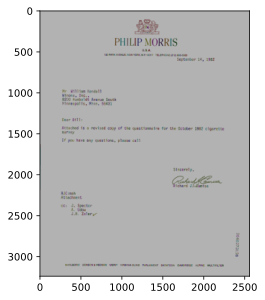

In [5]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)
plt.imshow(image_label_overlay)


In [6]:
mean_area = 0
counter = 0
for region in measure.regionprops(blobs_labels):
    if (region.area > 10):
        mean_area = mean_area + region.area
        counter = counter + 1
mean_area = (mean_area/counter)
mean_area

262.83539094650206

In [7]:

min_outliar = (mean_area*2.9762)+100
max_outliar = min_outliar*18

In [8]:
img = morphology.remove_small_objects(blobs_labels, min_outliar) 
small_mask = np.bincount(img.reshape(-1)) > max_outliar
small_mask_index = small_mask[img]
img[small_mask_index] = 0


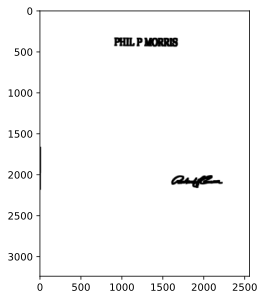

In [9]:
img = (img/img.max())*255
img=np.array(img,np.uint8)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)[1]
img = cv2.erode(img, np.ones((17,17)),50)
plt_disp(img)

24


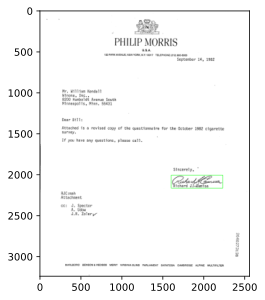

In [10]:
contour,_ = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour = sorted(contour,key =cv2.contourArea)[:-1]
print(len(contour))
c = max(contour,key =cv2.contourArea)
x,y,w,h =cv2.boundingRect(c)
img = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img)

## Converting into a function

In [11]:
def signature_detection(image:np.ndarray) -> None:
    # Gray Scale Conversion 
    img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # smoothing
    img=cv2.bilateralFilter(img,35, 105, 105)
    # Binary Scale Conversion
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]   
    # Connected Reagion Detection   
    blobs_labels = measure.label((img > img.mean()), background=1)
    # Mean Area calculation
    mean_area = 0; counter = 0   
    for region in measure.regionprops(blobs_labels):
        if (region.area > 10):
            mean_area = mean_area + region.area
            counter = counter + 1
    mean_area = (mean_area/counter)
    # Min_Max_outliar calculation
    min_outliar = (mean_area*2.9762)+100
    max_outliar = min_outliar*18    
    # Removing Outliar 
    img = morphology.remove_small_objects(blobs_labels, min_outliar) 
    small_mask = np.bincount(img.reshape(-1)) > max_outliar  
    img[small_mask[img]] = 0
    # Normalization
    img = np.array((img/img.max())*255,np.uint8)
    # Binary image Conversion
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)[1]
    # Erode image to find signature
    img = cv2.erode(img, np.ones((17,17)),50)
    # Contour detection
    contour = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)[0]    
    c = sorted(contour,key =cv2.contourArea)[-2]
    # Boundary Drawing    
    x,y,w,h =cv2.boundingRect(c)
    img = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    # display
    disp(img)


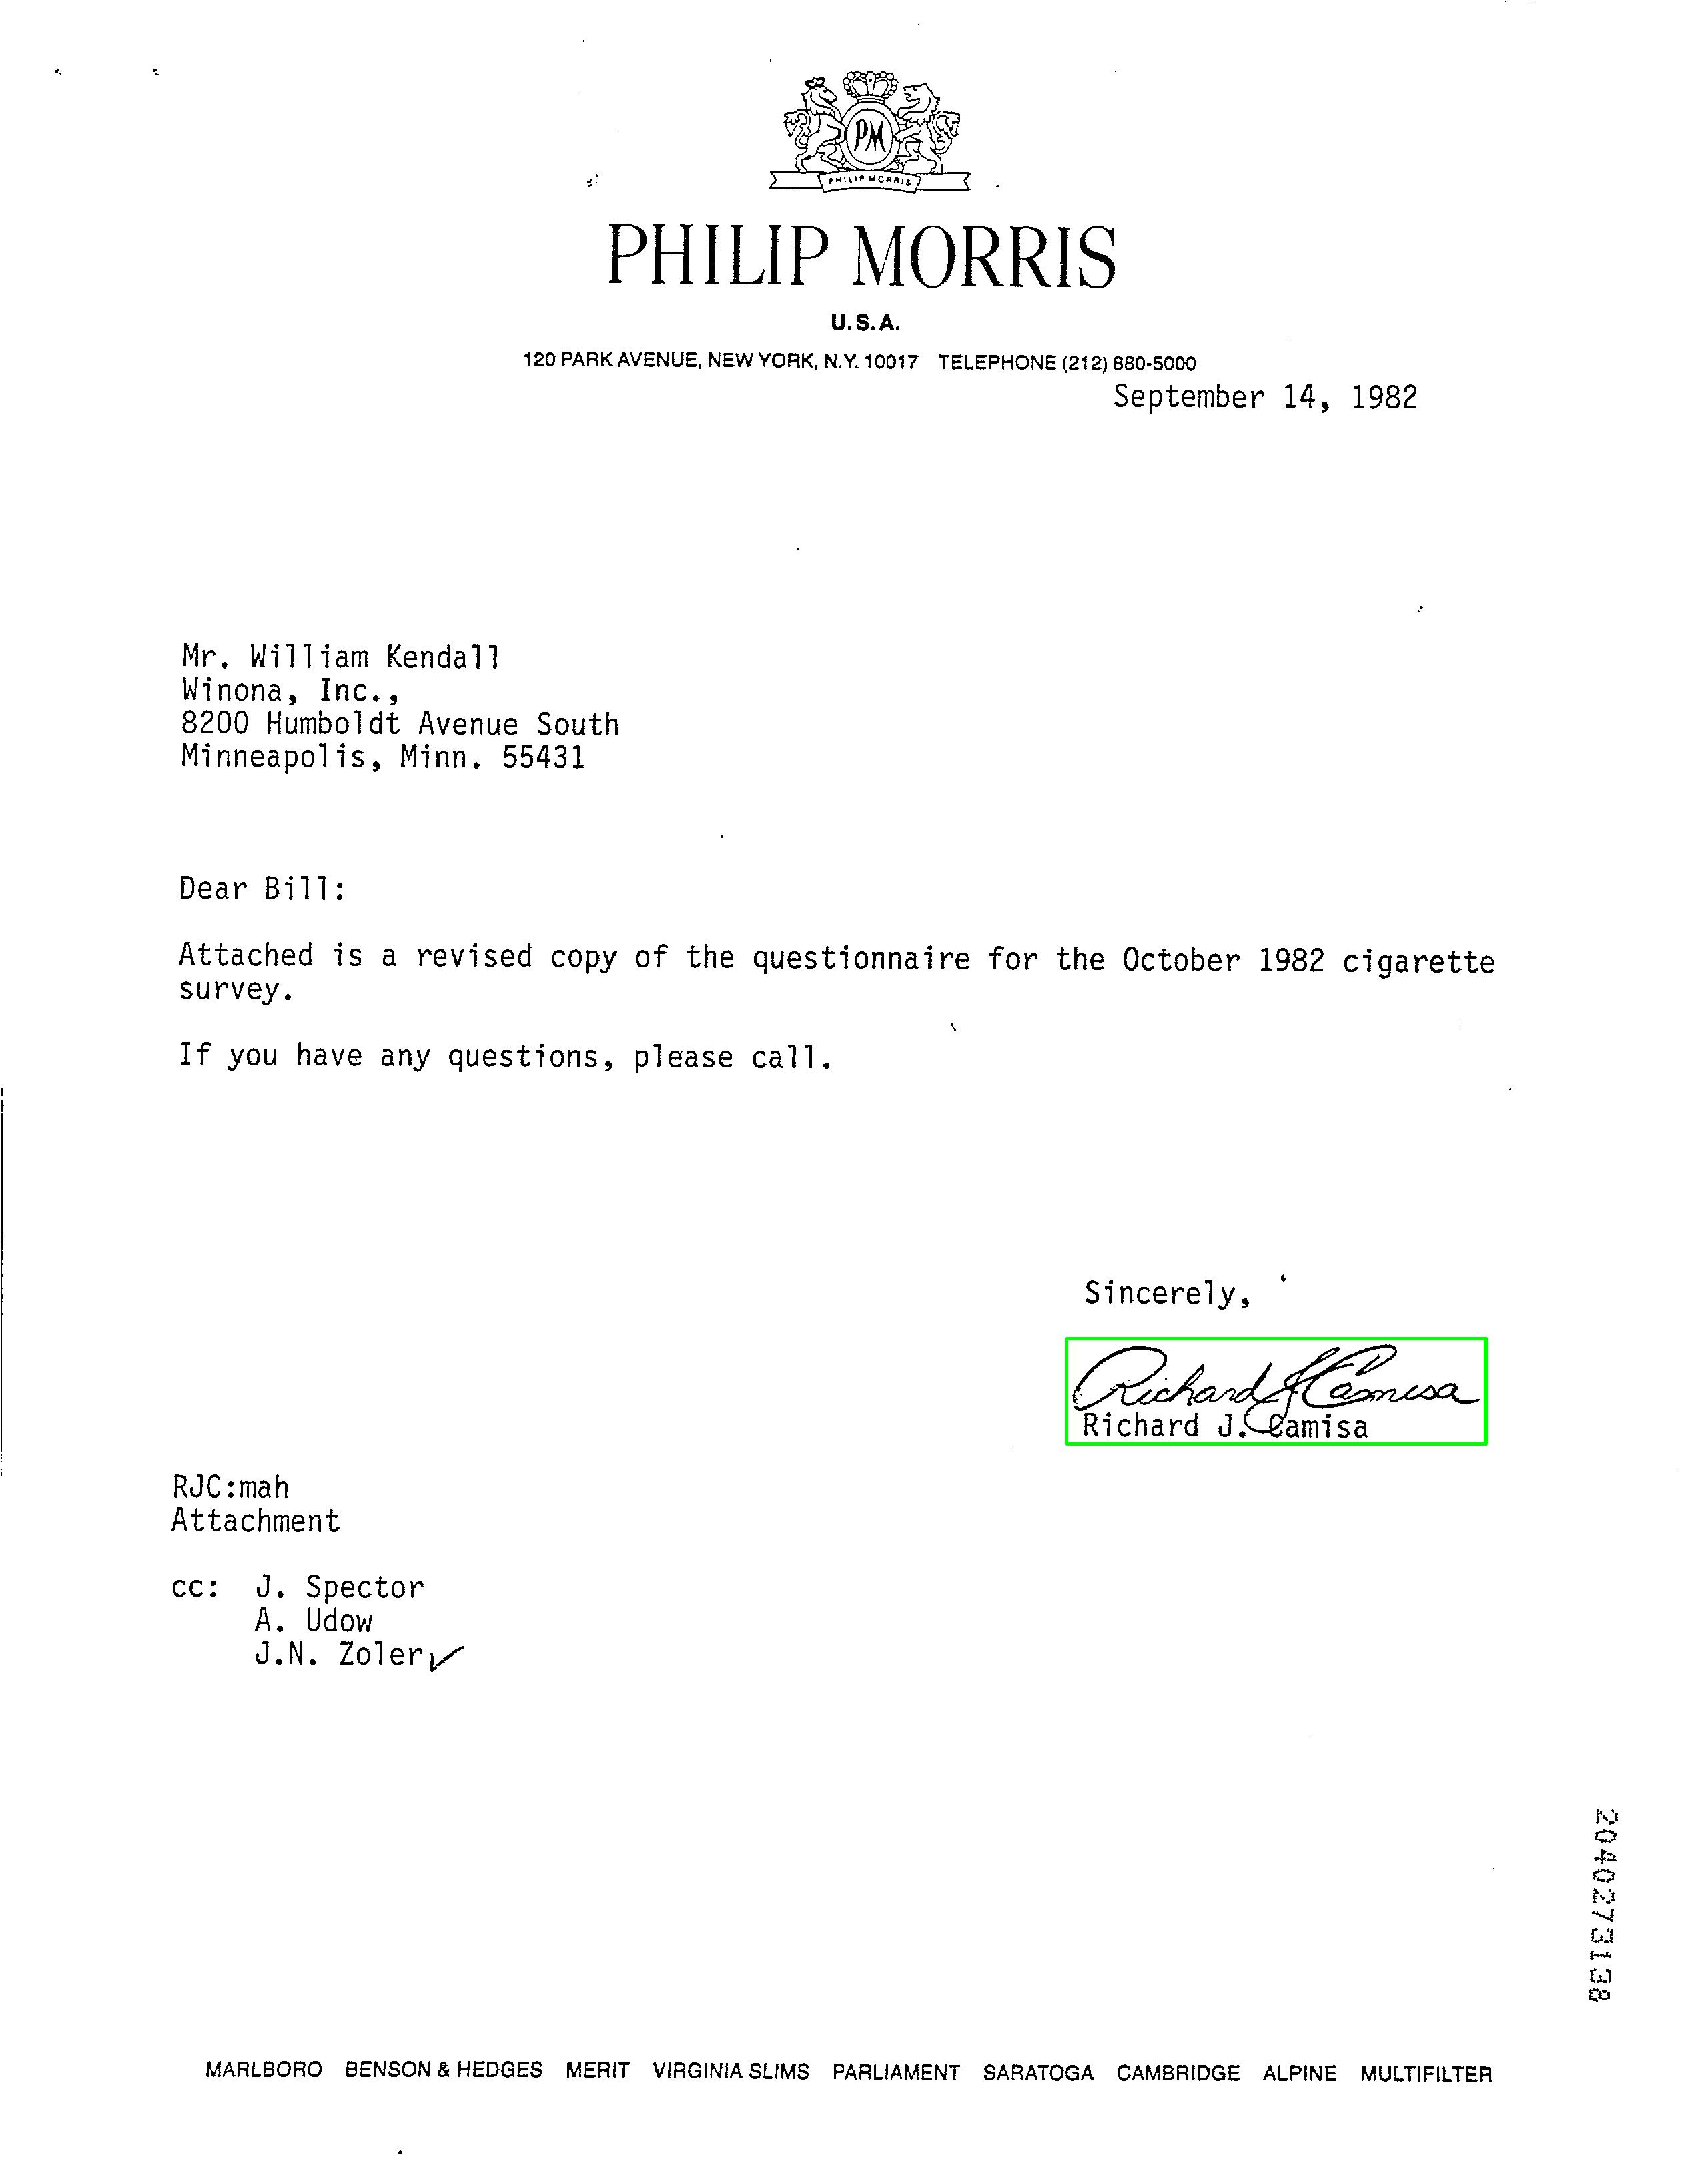

In [12]:
signature_detection(image)

#### Reference 
https://stackoverflow.com/questions/72001569/signature-detection-from-a-jpeg-file-code-setup